## Final Project Submission
* Student name: **Frank Kiptoo Ruto**
* Student pace: **Part Time**
* Instructor name: **Stella Waithera**

## Project Overview

For this project, the following movie data files were used:
* imdb.title.basics
* imdb.title.ratings
* tn.movie_budgets

## Business Problem
Microsoft has observed the trend of major companies producing their own unique films and is eager to join the excitement. To enter this field, they have chosen to establish a new movie studio. Exploratory Data Analysis was used to gain valuable insights into the top-performing movie genres at the box office. Based on the findings, recommendations were presented to assist Microsoft's new movie studio in determining the most suitable genres for their future productions.

Some of the questions to be answered:
* What type of genres have the highest rating?
* What is the most popular genre by the number of votes?
* Does the the production budget affect the profits and the returns on investment?


## Methodology
The following steps were taken:
* Importation of Libraries
* Loading the Data Files into a Dataframe
* Exploratory Data Analysis (EDA)
* Data Visualization
* Recomendations
* Conclussion

## Importation of Libraries

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the Data Files into a Dataframe

In [2]:
# reading the csv files
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

## Movie_gross dataframe EDA

In [3]:
# previewing the first 10 rows
movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [4]:
# check no.or rows and columns
movie_budgets.shape

(5782, 6)

In [5]:
# check columns names
movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [6]:
# check the overview of the df
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the overview, it can be seen that the production budget, domestic gross and worldwide gross columns are of data types 'Object', we would need to convert the types into data type 'integer' in order to determine the Return on Investment (ROI) of the different movies. The columns do not have missing values as well, which is great. The production budget, domestic gross and worldwide gross columns have commas and the dollar ($) sign which we would have to remove in order to work with the values.

In [7]:
# Remove $ sign from currency using a lambda function
movie_budgets['production_budget'] = movie_budgets.production_budget.apply(lambda x: x.replace('$',''))
movie_budgets['domestic_gross'] = movie_budgets.domestic_gross.apply(lambda x: x.replace('$',''))
movie_budgets['worldwide_gross'] = movie_budgets.worldwide_gross.apply(lambda x: x.replace('$',''))

# Remove , from the values in the production budget, domestic gross and worldwide gross columns
movie_budgets['production_budget'] = movie_budgets.production_budget.apply(lambda x: x.replace(',',''))
movie_budgets['domestic_gross'] = movie_budgets.domestic_gross.apply(lambda x: x.replace(',',''))
movie_budgets['worldwide_gross'] = movie_budgets.worldwide_gross.apply(lambda x: x.replace(',',''))

After removing the $ sign and commas, we can then convert the production budget, domestic gross and worldwide gross columns to data type int in order to work out ROI

In [8]:
# check the new dataframe with the removed $ and commas
movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [9]:
# converting foreign gross and domestic gross from object to int
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype('int64')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype('int64')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype('int64')

In [10]:
# previewing the overview of the df after conversion
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [11]:
# check for movie duplicates
movie_budgets['movie'].duplicated().sum()

84

In [12]:
# remove the duplicates
movie_budgets.drop_duplicates(subset='movie',keep='first',inplace=True)

In [13]:
# preview the dataset after removing the duplicates
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5698 non-null   int64 
 1   release_date       5698 non-null   object
 2   movie              5698 non-null   object
 3   production_budget  5698 non-null   int64 
 4   domestic_gross     5698 non-null   int64 
 5   worldwide_gross    5698 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 311.6+ KB


The next step is to check for columns that have zero values

In [14]:
# check for 0 records under worldwide_gross column
movie_budgets[movie_budgets['worldwide_gross'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,"Dec 31, 2020",Moonfall,150000000,0,0
479,80,"Dec 13, 2017",Bright,90000000,0,0
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0
5771,72,"May 19, 2015",Family Motocross,10000,0,0
5777,78,"Dec 31, 2018",Red 11,7000,0,0


From the data, it can be seen that there are records of movies that do have a 0 domestic and worldwide gross. We can proceed with the records that do not have 0 domestic and worldwide gross. In order to determine which movies are the most profitable, the ROI will be determined. The worldwide gross and the production budget will be used for the ROI, since it includes all box office revenues.

In [15]:
# drop records where worldwide_gross is 0
movie_budgets = movie_budgets[~(movie_budgets['worldwide_gross'] == 0)]
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [16]:
# check for 0 records under domestic_gross column
movie_budgets[movie_budgets['domestic_gross'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
617,18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125
619,20,"Jan 22, 2019",Renegades,77500000,0,1521672
820,21,"Oct 26, 2018",Air Strike,65000000,0,516279
1325,26,"Dec 31, 2012",Foodfight!,45000000,0,73706
1367,68,"Dec 31, 2006",Les BronzÃ©s 3: amis pour la vie,42000000,0,83833602
...,...,...,...,...,...,...
5590,91,"Mar 24, 2015",Along the Roadside,250000,0,3234
5652,53,"Dec 31, 2015",Lumea e a mea,168000,0,29678
5661,62,"Dec 31, 2013",Speak No Evil,150000,0,32927
5705,6,"Dec 31, 2011",Absentia,70000,0,8555


In [17]:
# drop records where domestic_gross is 0
movie_budgets = movie_budgets[~(movie_budgets['domestic_gross'] == 0)]
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [18]:
# create a column revenue of the revenues generated by different movies
movie_budgets['Revenue'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']
movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923


In [19]:
# create a column of the ROI generated by the different movies
movie_budgets['ROI'] = (movie_budgets['Revenue'] / movie_budgets['production_budget']) * 100
movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,571.016739
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425,221.140142
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,118.648403
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,193.206974


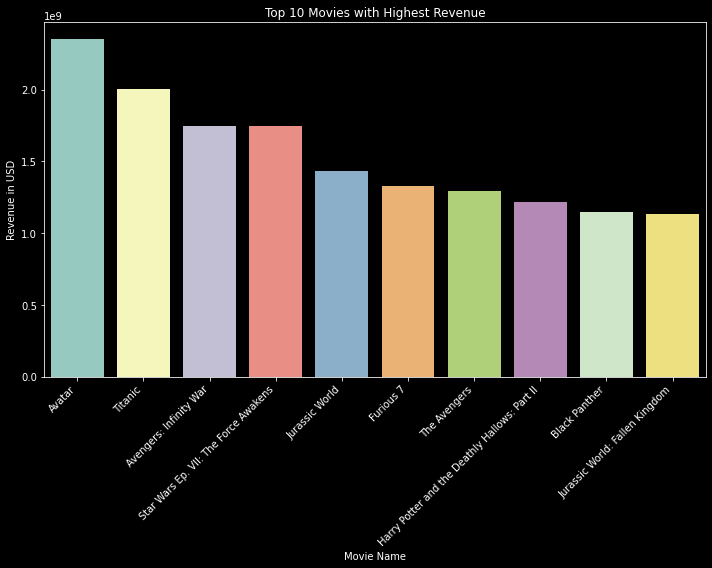

In [50]:
# Sort the DataFrame by Revenue in descending order
sorted_movie = movie_budgets.sort_values(by ='Revenue', ascending = False)

# Select the top 10 movies with the highest Revenue
top_10_movies = sorted_movie.head(10)

# Plot the Revenue vs. Movie Name
plt.figure(figsize=(10, 8))
sns.barplot(x = 'movie', y = 'Revenue', data = top_10_movies)
plt.style.use('dark_background')
plt.xticks(rotation=45, ha ='right')
plt.xlabel('Movie Name')
plt.ylabel('Revenue in USD')
plt.title('Top 10 Movies with Highest Revenue')
plt.tight_layout()
plt.show()

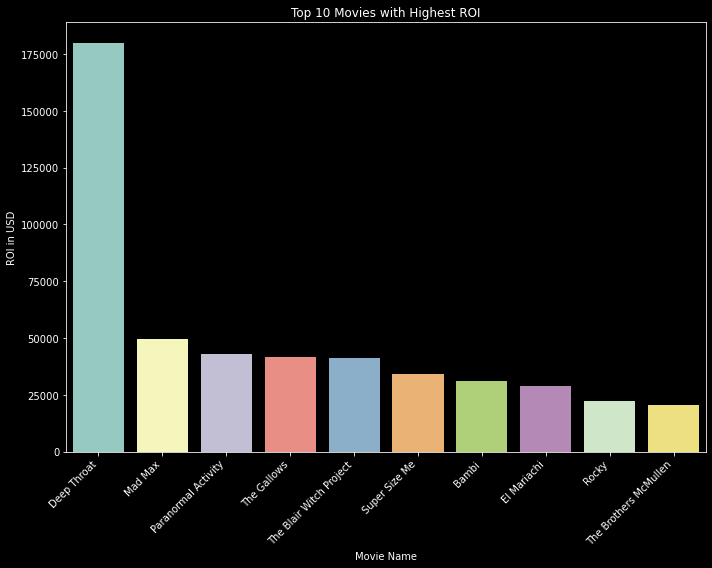

In [21]:
# Sort the DataFrame by ROI in descending order
sorted_movie = movie_budgets.sort_values(by ='ROI', ascending = False)

# Select the top 10 movies with the highest Revenue
top_10_movies = sorted_movie.head(10)

# Plot the Revenue vs. Movie Name
plt.figure(figsize=(10, 8))
sns.barplot(x = 'movie', y = 'ROI', data = top_10_movies)
plt.xticks(rotation=45, ha ='right')
plt.xlabel('Movie Name')
plt.ylabel('ROI in USD')
plt.title('Top 10 Movies with Highest ROI')
plt.tight_layout()
plt.show()

## Findings

From the above barplots, the following observations can be made:
* A movie can have the highest revenus in the box office but does not necessarily imply a higher ROI, in this case Avatar was the highest grossing movie by revenue but was not among the movies with the highest ROI.
* A movie like Deep throat was not among the highest grossing movies but has the highest ROI. This is because the production budget was less and the revenue generated by the movie was more, hence the high ROI

Avatar may have had a higher production budget and a higher grossing income but the ratio of budget to worldwide gross may not have been higher compared to a movie like Deep Throat

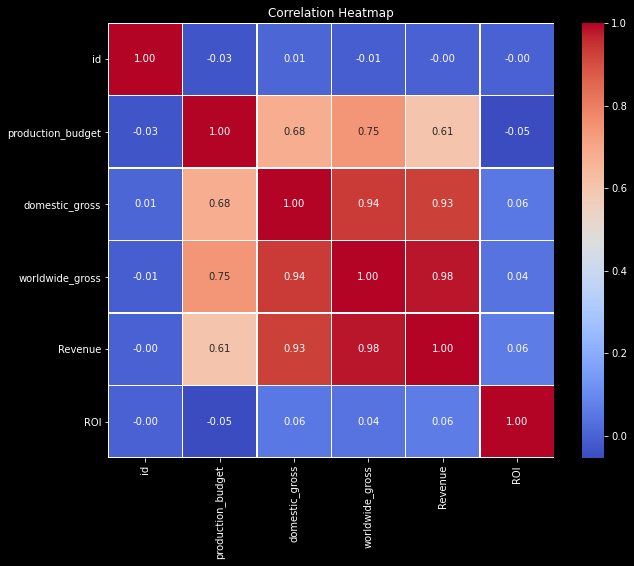

In [22]:
# calculate the correlation between the different incomes i.e production budget, domestic gross and worldwide gross
correlation_matrix = movie_budgets.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap represents the correlation matrix between different numerical columns related to movie budgets (domestic, worldwide, and production budget) in the DataFrame.
Each cell in the heatmap contains a correlation coefficient, which measures the strength and direction of the relationship between two variables (budgets). The correlation coefficient ranges from -1 to 1. 
A high correlation between domestic and worldwide budget of 0.94 indicates that movies with higher domestic gross incomes tend to have higher worldwide gross incomes as well.
A moderately high coefficient of 0.75 between production budget and worldwide gross indicates an increase in production budget tends to lead to an increase in the worldwide gross.

correlation coefficient between production_budget and worldwide_gross: 0.7463980543365651
correlation coefficient between production_budget and domestic_gross: 0.6819410163832446


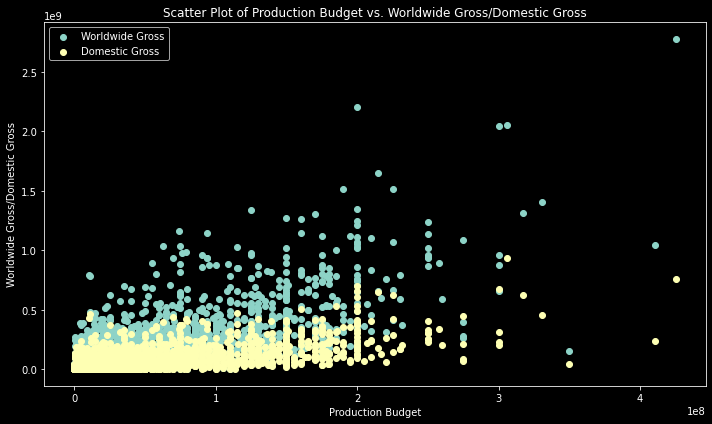

In [23]:
#  calculate the correlation coefficient between production_budget and worldwide_gross
corr = movie_budgets['production_budget'].corr(movie_budgets['worldwide_gross'])
print("correlation coefficient between production_budget and worldwide_gross:", corr)

#  calculate the correlation coefficient between production_budget and domestic_gross
corr = movie_budgets['production_budget'].corr(movie_budgets['domestic_gross'])
print("correlation coefficient between production_budget and domestic_gross:", corr)

# creating the subplot
plt.figure(figsize=(10, 6))
# Plotting the scatter plot
plt.scatter(movie_budgets['production_budget'], movie_budgets['worldwide_gross'], label = 'Worldwide Gross')
plt.scatter(movie_budgets['production_budget'], movie_budgets['domestic_gross'], label = 'Domestic Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross/Domestic Gross')
plt.title('Scatter Plot of Production Budget vs. Worldwide Gross/Domestic Gross')
plt.legend()
plt.tight_layout()
plt.show()

## Findings and Summary

### Findings

From the Scatter Plot of Production Budget vs. Worldwide Gross/Domestic Gross, it can be observed that the production budget and worldwide gross correlation coefficient is 0.7463980543365651. This suggests that there is a strong positive relationship between the two. As one variable increases, the other tends to increase as well, and vice versa. Even though there is a strong correlation between the two variables, it does not necessarily mean that one causes the other to change. Generally, big-budget films with higher production costs tend to have larger marketing campaigns, better production values, and access to a wider audience. These factors can contribute to higher box office revenues and international appeal, leading to a positive correlation between the production budget and worldwide gross of a movie. While there is a strong correlation between production budget and worldwide gross, it does not necessarily mean that increasing the production budget will directly cause higher worldwide gross revenue. Many other factors, such as the quality of the movie, the storyline, the cast, the timing of the release, and competition in the market, also play a crucial role in determining a movie's success at the box office.

The production budget and domestic gross correlation coefficient is 0.6819410163832446. This is a moderately positive correlation which implies that on average, as the production budget increases, the domestic gross revenue tends to increase as well. This finding aligns with common expectations in the film industry. Films with larger production budgets often have higher production values, access to better resources. These factors can collectively lead to higher ticket sales and increased revenue at the domestic box office.

## Title_basics & title_ratings dataframes EDA

## title_basics

In [24]:
# check the first 10 records
title_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [25]:
# check the no. of rows and columns
title_basics.shape

(146144, 6)

It can be observed that the above dataframe has 146144 records and 6 columns

In [26]:
# check the overview of the df
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


From the overview, it can be observed that there are no null values in the tconst, start year and primary titles which are of object datatype.
The original title column has a slightly high missing value percentage compared to the runtime minutes and genres columns which have a fairly large percentage of missing values

In [27]:
# check for the sum of missing values in the df
title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

* The original title has 21 missing values
* The runtime minutes has 31739 missing values
* The genres column has 5408 missing values

In [28]:
# check for duplicates in primary title column
title_basics['primary_title'].duplicated().sum()

10073

In [29]:
# check sum of duplicate values in original title column
title_basics['original_title'].duplicated().sum()

8370

In [30]:
# drop duplicate values in primary_title and original_title
title_basics.drop_duplicates(subset=['primary_title', 'original_title'], keep='first', inplace=True)
title_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


For the analysis of the data, it would make sense to drop the records of original_title, runtime_minutes and genres with missing values since we cannot replace the missing values with the mean, median or mode. The mean, mode and median works for values that are integers or floats but in this case the films have different titles, genres and different runtime minutes. It would not be an accurate representation of the films.
The most suitable option is to drop the records in the different columns with missing values

In [31]:
# drop null records in original_title, runtime_minutes and genres columns
title_basics.dropna(subset = ['original_title', 'runtime_minutes', 'genres'], inplace=True)
title_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography
10,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History
12,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary


In [32]:
# check overview of the new df
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106398 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           106398 non-null  object 
 1   primary_title    106398 non-null  object 
 2   original_title   106398 non-null  object 
 3   start_year       106398 non-null  int64  
 4   runtime_minutes  106398 non-null  float64
 5   genres           106398 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.7+ MB


### Flattening the genres data

In [33]:
# split the genres column values
title_basics['genres'] = title_basics['genres'].str.split(',')
title_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,[Comedy]
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"[Adventure, Animation, Comedy]"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,[Biography]
10,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,[Drama]
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,[History]
12,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,[Documentary]


In [34]:
# explode the genres column to get multiple rows for each film by genre and preview the first 10 records
title_basics = title_basics.explode('genres')
title_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Fantasy
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [35]:
# get the value counts of the different genres
genres_df = title_basics['genres'].value_counts().reset_index()
genres_df.columns = ['genres', 'No. of Movies']
genres_df

,genres,No. of Movies
0,Documentary,41885
1,Drama,38894
2,Comedy,20042
3,Thriller,8814
4,Horror,7991
5,Biography,7899
6,Action,7625
7,Romance,7350
8,History,5618
9,Adventure,5496


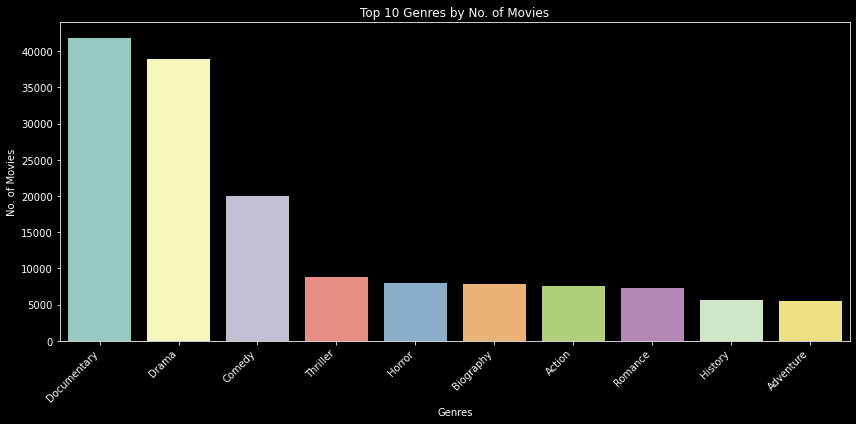

In [36]:
# Plotting the bar plot
plt.figure(figsize = (12, 6))
sns.barplot(x = 'genres', y = 'No. of Movies', data = genres_df.head(10), ci = None)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genres')
plt.ylabel('No. of Movies')
plt.title('Top 10 Genres by No. of Movies')
plt.tight_layout()
plt.show()

## Findings

From the above barplot, it can be seen that Documentary films have the largest number of movies with 41885 films, followed by drama and comedy.

## title_ratings

In [37]:
# preview first 10 records
title_ratings.head(10)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [38]:
# check no. of rows and columns
title_ratings.shape

(73856, 3)

The dataframe has 73856 records and 3 columns

In [39]:
title_ratings.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

The df has 3 columns namely:
* tconst
* averagerating
* numvotes

In [40]:
# previe the overview of the dataframe
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


From the overview, it can be seen that the dataframe has no null values in the columns

In [41]:
# merge the title basics dataframe and the title ratings using the tconst column which is common in
# both dataframes
merged_df = pd.merge(title_basics, title_ratings, on = 'tconst')
merged_df.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
6,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy,6.5,119
7,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Drama,6.5,119
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Fantasy,6.5,119
9,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,Adventure,8.1,263


In [42]:
# check the info of the merged_df
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112707 entries, 0 to 112706
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112707 non-null  object 
 1   primary_title    112707 non-null  object 
 2   original_title   112707 non-null  object 
 3   start_year       112707 non-null  int64  
 4   runtime_minutes  112707 non-null  float64
 5   genres           112707 non-null  object 
 6   averagerating    112707 non-null  float64
 7   numvotes         112707 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 7.7+ MB


In [43]:
# get the value counts of the different genres
merged_df['genres'].value_counts()

Drama          26754
Documentary    15902
Comedy         15002
Thriller        6953
Horror          6462
Action          5963
Romance         5685
Crime           4081
Biography       3566
Adventure       3502
Family          3111
Mystery         2676
History         2629
Sci-Fi          1931
Fantasy         1887
Music           1783
Animation       1580
Sport           1041
War              767
Musical          613
News             560
Western          241
Reality-TV        13
Adult              2
Game-Show          2
Short              1
Name: genres, dtype: int64

From this, it can be seen that most films are of the genre type drama with a number of 26754 films and there are 26 genres in total.

## Top genres with the highest ratings

In [44]:
# create a df of genres with the highest ratings
ratings_df = merged_df[['genres', 'averagerating']]
ratings_df

,genres,averagerating
0,Action,7.0
1,Crime,7.0
2,Drama,7.0
3,Biography,7.2
4,Drama,7.2
...,...,...
112702,Drama,8.4
112703,Documentary,6.2
112704,Documentary,6.2
112705,Drama,8.7


In [45]:
# groupby averagerating and find the mean average values
average_ratings = ratings_df.groupby('genres')['averagerating'].mean().reset_index()
# sort the average_ratings using the averagerating column
average_ratings.sort_values(by = 'averagerating', inplace = True, ascending = False)
average_ratings

,genres,averagerating
21,Short,8.800000
7,Documentary,7.318419
11,Game-Show,7.300000
17,News,7.273929
4,Biography,7.177342
14,Music,7.090746
12,History,7.048878
22,Sport,6.957061
18,Reality-TV,6.600000
24,War,6.572751


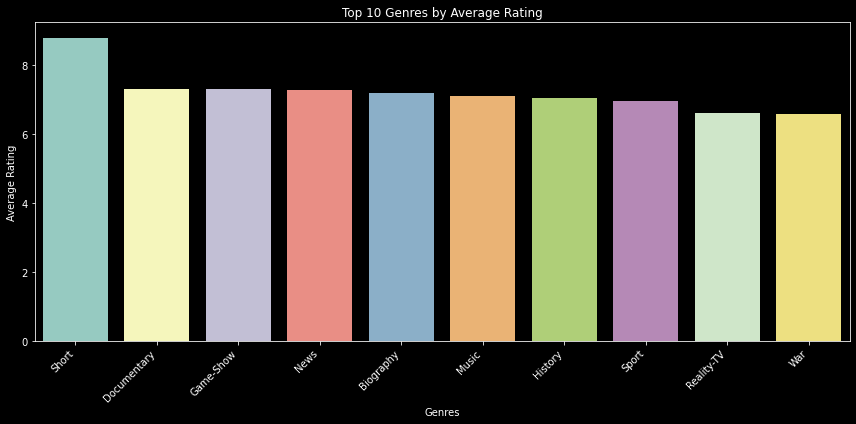

In [46]:
# Plotting the bar plot
plt.figure(figsize = (12, 6))
sns.barplot(x = 'genres', y = 'averagerating', data = average_ratings.head(10), ci = None)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres by Average Rating')
plt.tight_layout()
plt.show()

From the above, it can be seen that documentary and short films have the highest ratings

## Top genres by number of votes

In [47]:
# create a numvotes_df with genres and number of votes
numvotes_df = merged_df[['genres', 'numvotes']]
numvotes_df

,genres,numvotes
0,Action,77
1,Crime,77
2,Drama,77
3,Biography,43
4,Drama,43
...,...,...
112702,Drama,365
112703,Documentary,5
112704,Documentary,6
112705,Drama,136


In [48]:
# group numvotes_df by numvotes and get the sum of the number of votes
numvotes_df = numvotes_df.groupby('genres')['numvotes'].sum().reset_index()
# sort numvotes_df by numvotes column in descending order
numvotes_df.sort_values(by = 'numvotes', inplace = True, ascending = False)
numvotes_df

,genres,numvotes
8,Drama,112212219
0,Action,98053385
2,Adventure,81038804
5,Comedy,70088347
23,Thriller,44818839
20,Sci-Fi,41188776
6,Crime,37030348
19,Romance,25685881
10,Fantasy,25542966
16,Mystery,23113744


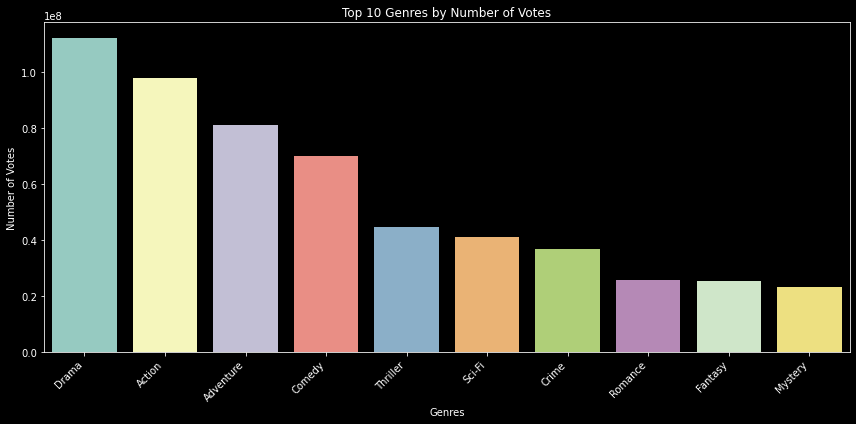

In [49]:
# Plotting the bar plot
plt.figure(figsize = (12, 6))
sns.barplot(x = 'genres', y = 'numvotes', data = numvotes_df.head(10), ci = None)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genres')
plt.ylabel('Number of Votes')
plt.title('Top 10 Genres by Number of Votes')
plt.tight_layout()
plt.show()

## Findings

From the barplot above, it can be seen that drama movies have the highest number of votes amongst people while the least is short films with a number of 8 votes

## Recommendations & Conclusion

### Recomendations

### 1. Most Popular Genres by rating

Based on the analysis and the findings, the top rated genre is short films, followed by documentaries and game-shows. It looks like the most rated which implies the most liked genre is short films, however, the average rating of short films is derived from a few number of movies under short films with a higher rating hence the high rating of short films compared to documentaries.
A high rating for a movie is an indication of the audience's positive response and overall satisfaction with the film. Microsoft should consider producing movies with a higher rating with a focus in good storytelling, strong acting performances by talented actors, skillful direction, emotional engagement, originaity and creativity, relevance and social impact. Movies that address relevant social issues or have a meaningful message can get higher ratings for their impact and significance.
This would improve the popularity of the movies. 


### 2. Most Popular Genres by number of votes

From the analysis of genres and number of votes, it is found that the most popular genre by number of votes is: 
* Drama 
* Action 
* Adventure  
* Comedy

A high vote count for a movie can be influenced by various factors because it is a combination of audience engagement and movie quality. Movies that are heavily promoted, have wide distribution, and gain significant media attention tend to attract more viewers, leading to a higher vote count. Positive word-of-mouth recommendations from viewers who enjoyed the movie can lead to more people watching the film and voting positively. Movies that are enjoyed by viewers may be watched multiple times, leading to a higher vote count. 

My recommendation to Microsoft is to produce movies which are popular to the viewers which is Drama or Action films because they are most preferred by viewers. There are several reasons why people would prefer each but the most common reason is drama movies often evoke emotional depth, character development, and thought-provoking themes. They can evoke a wide range of emotions, making viewers feel connected to the characters and their stories. Many people enjoy dramas for their realism, powerful storytelling, and opportunities for introspection. Comedy movies on the other hand aim to make audiences laugh and entertain them through humor and wit. They provide lighthearted and enjoyable experiences, offering a break from the stresses of daily life. Comedies can be relatable, providing shared laughter and bonding experiences with friends and family. 
Action movies provide thrilling and adrenaline-pumping experiences. They are known for their fast-paced sequences, intense fight scenes, and special effects. Action movies offer entertainment, attracting viewers who enjoy suspense, heroism, and high-stakes adventures.

### 3. Production budget and Profits/ROI

The production budget of a movie can significantly impact both its profits and returns on investment (ROI). The production budget represents the total cost incurred in making the movie, including expenses related to scriptwriting, casting, crew, sets, special effects, marketing, and other production-related costs. 
From the datafile on movie_gross, it was observed that Avatar was the highest grossing movie by gross revenue while Deep Throat was not among the highest grossing movies but had the highest ROI. 
Having a high ROI while still generating lower gross revenue is common in independent films or low-budget productions. These movies might not achieve massive box office success, but their profitability is relatively high due to their lower costs. Such movies might find success through targeted marketing, limited releases, or streaming platforms, catering to niche audiences with specific interests. However,  ROI is just one aspect of a movie's success, and the overall performance and reception of a film also depends on audience feedback, critical acclaims among many other aspects. 

My recommendation to microsoft is to produce movies that have a lower production cost while focusing on areas like targeted marketing, limited releases, and streaming platforms. This would increase their profitability and their ROI. While the cost of production might be low, they should not compromise on the quality. If a movie has a high production budget, it needs to generate substantial revenue at the box office to cover its costs and be considered profitable. Higher production budgets entail higher financial risks. If a movie with a large budget fails to perform well at the box office, it may result in significant financial losses for the producers and investors. Conversely, if the movie is successful, the potential rewards and profits can also be substantial.

### Conclusion

Based on the analysis and findings, several key recommendations can be made to Microsoft for their movie production strategy:

1. Firstly, it is evident that short films, documentaries, and game-shows are the most popular genres by rating. While short films have the highest average rating, their popularity is derived from a few highly-rated movies. Therefore, Microsoft should focus on producing movies with higher ratings, emphasizing on good storytelling, strong acting performances, skillful direction, emotional engagement, originality, creativity, and addressing relevant social issues. Such movies are likely to receive positive responses from the audience, leading to increased popularity and overall satisfaction.

2. Secondly, the most popular genres by the number of votes are Drama, Action, and Adventure. To cater to viewer preferences, Microsoft should consider producing Drama and Action films. Drama movies can evoke emotional depth and thought-provoking themes, fostering a strong connection with viewers. On the other hand, Action films provide thrilling experiences with fast-paced sequences and high-stakes adventures, appealing to audiences who enjoy suspense and heroism.

3. Lastly, considering the relationship between production budget and profits/ROI, Microsoft should aim to produce movies with lower production costs while strategically utilizing targeted marketing, limited releases, and streaming platforms. This approach can increase profitability and ROI, especially for niche films or low-budget productions. However, it is crucial not to compromise on the quality of the films, as audience feedback and critical acclaim play vital roles in a movie's overall success.

By incorporating these recommendations into their movie production strategy, Microsoft can enhance their chances of producing successful and well-received films, effectively capturing the interests and preferences of their audience while maximizing their return on investment.